# What is Linear Regression?

Linear regression is a _ of machine learning that is used to detect linear correlations in data.  

## Importing stuff

In [258]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [259]:
colors = ['#4F2683', '#FFC62F' , 'f2f2f2']

##  Setting the dataframe up

In [260]:
df = pd.read_csv('pbp-2023.csv')
df.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023121101,2023-12-11,3,1,28,NYG,GB,0,0,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2023121101,2023-12-11,3,1,35,NYG,GB,3,7,92,...,0,0,NaN,8,OPP,0,NaN,0,NaN,0
2,2023121101,2023-12-11,3,2,19,NYG,GB,2,11,88,...,0,0,RIGHT GUARD,12,OPP,0,NaN,0,NaN,0
3,2023121101,2023-12-11,3,2,56,NYG,GB,1,10,89,...,0,0,CENTER,11,OPP,0,NaN,0,NaN,0
4,2023121101,2023-12-11,3,3,43,NYG,GB,1,10,64,...,0,0,NaN,36,OPP,0,NaN,0,NaN,0


In [261]:
df.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'Unnamed: 10',
       'SeriesFirstDown', 'Unnamed: 12', 'NextScore', 'Description', 'TeamWin',
       'Unnamed: 16', 'Unnamed: 17', 'SeasonYear', 'Yards', 'Formation',
       'PlayType', 'IsRush', 'IsPass', 'IsIncomplete', 'IsTouchdown',
       'PassType', 'IsSack', 'IsChallenge', 'IsChallengeReversed',
       'Challenger', 'IsMeasurement', 'IsInterception', 'IsFumble',
       'IsPenalty', 'IsTwoPointConversion', 'IsTwoPointConversionSuccessful',
       'RushDirection', 'YardLineFixed', 'YardLineDirection',
       'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay', 'PenaltyType',
       'PenaltyYards'],
      dtype='object')

In [262]:
x = df['OffenseTeam'].unique()
for i in x:
    print(i)

NYG
TEN
MIA
GB
LAC
DEN
BUF
KC
NO
CAR
CLE
JAX
SF
CIN
IND
SEA
PHI
DAL
HOU
NYJ
LV
MIN
BAL
ATL
TB
CHI
DET
LA
PIT
NE
WAS
ARI


## Preprocessing

### Choosing columns

**Yes**: Quarter, Minute, Second, Down, YardLine, Yards, IsInterception, PassType, PenaltyYards, PenaltyType, IsIncomplete, IsTouchdown, IsFumble, IsRush, IsPass,ToGo, SeriesFirstDown, YardLineFixed, PlayType

**No**: GameId, Unnamed: 10, GameDate, Unnamed: 12, Unnamed: 16, Unnamed: 17, NextScore, Description,  TeamWin, SeasonYear, IsTwoPointConversion, IsTwoPointConversionSuccessful, ChallengerIsSack, IsChallenge, IsChallengeReversed, IsMeasurement, RushDirection, IsNoPlay, Formation

**Data Splitters**: DefenseTeam, OffenseTeam, PenaltyTeam, IsPenaltyAccepted

In [263]:
yes_string =  "DefenseTeam, OffenseTeam, PenaltyTeam, IsPenaltyAccepted, Quarter, Minute, Second, Down, YardLine, Yards, PenaltyYards, PenaltyType, ToGo, YardLineFixed"
yes_list = yes_string.split(', ')

In [264]:
yes_list

['DefenseTeam',
 'OffenseTeam',
 'PenaltyTeam',
 'IsPenaltyAccepted',
 'Quarter',
 'Minute',
 'Second',
 'Down',
 'YardLine',
 'Yards',
 'PenaltyYards',
 'PenaltyType',
 'ToGo',
 'YardLineFixed']

In [265]:
df = df[yes_list]
v = df[df["Down"] != 0]
v = v[v["Yards"] < 99]

### Sorting

In [266]:
o = v[v['OffenseTeam'] == 'MIN']
d = v[v['DefenseTeam'] ==  'MIN']
p = v[v['PenaltyTeam'] == 'MIN']

In [267]:
offense = o.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam', 'PenaltyYards', 'IsPenaltyAccepted', 'PenaltyType'], axis = 1)
defense = d.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam', 'PenaltyYards', 'IsPenaltyAccepted', 'PenaltyType'], axis = 1)
penalty = p.drop(['OffenseTeam', 'DefenseTeam', 'PenaltyTeam'], axis = 1)

## Experiment 1 Offense:

### Data Understanding

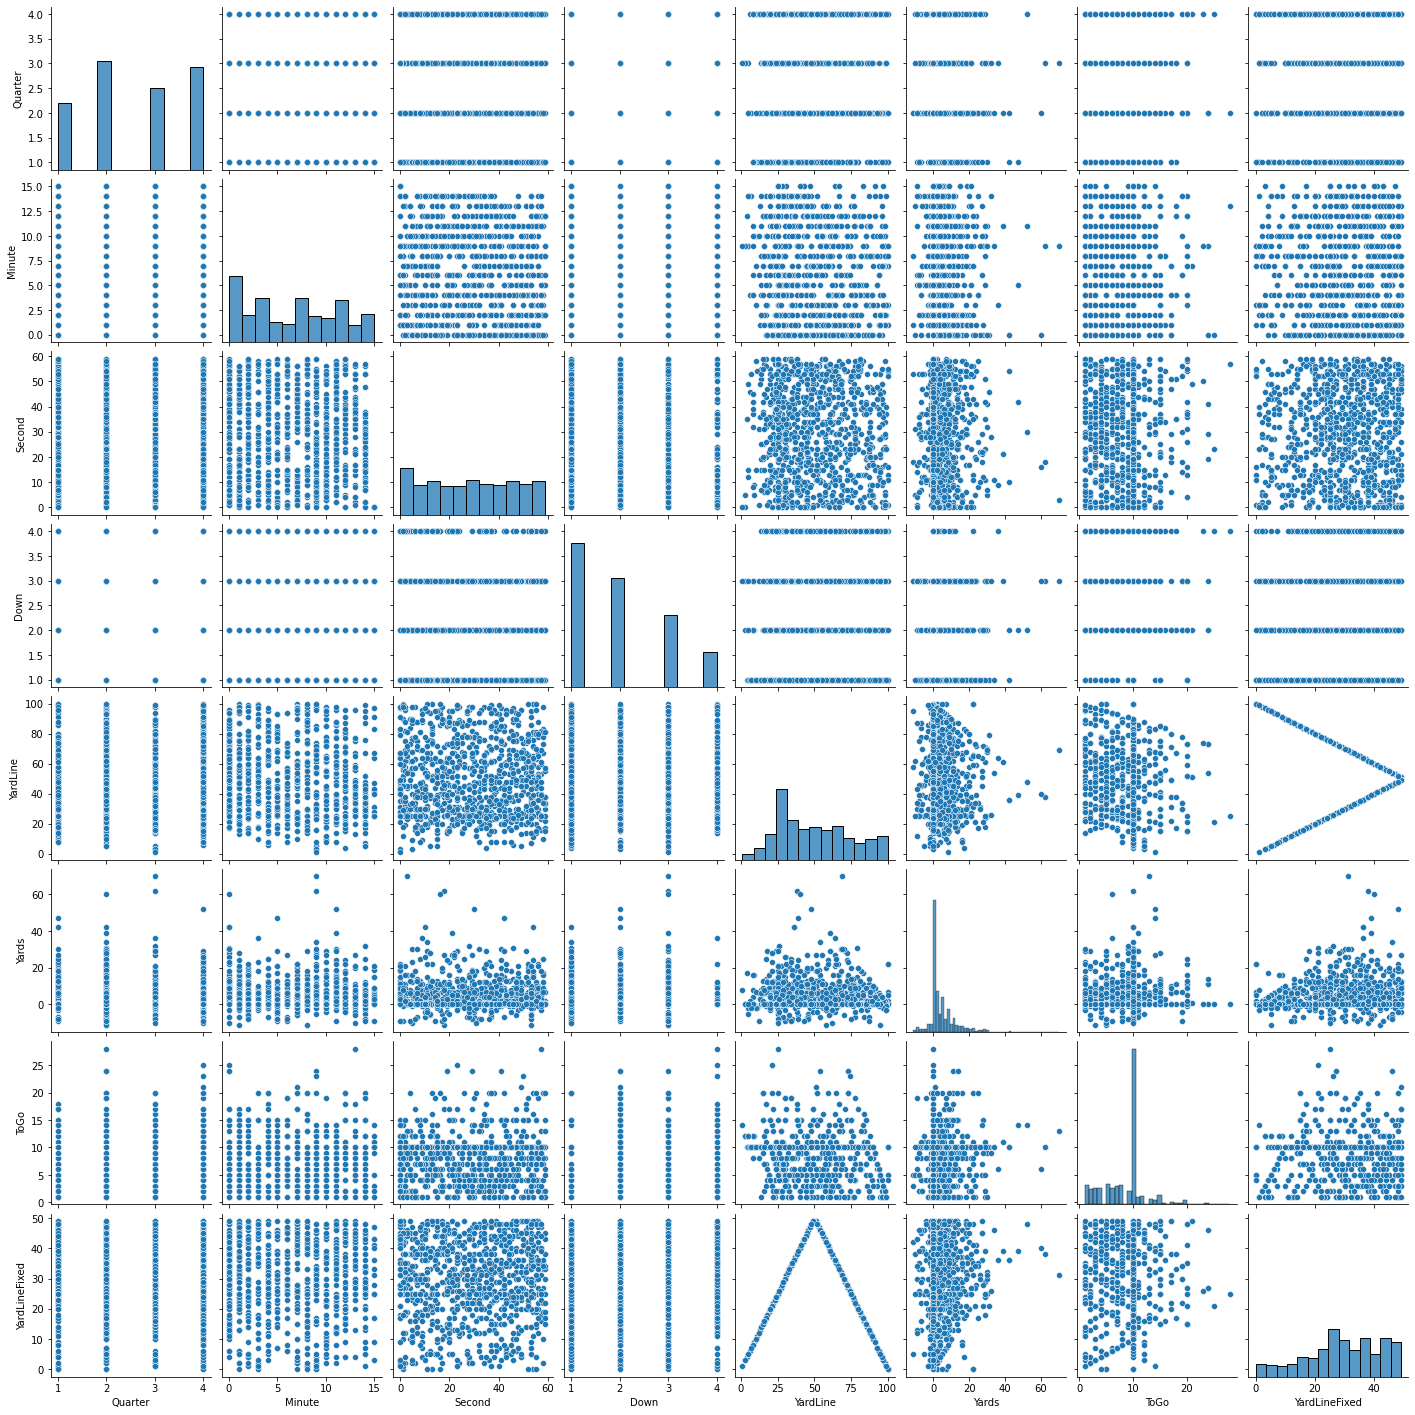

In [268]:
sns.pairplot(data = offense)

In [269]:
offense.corr()

,Quarter,Minute,Second,Down,YardLine,Yards,ToGo,YardLineFixed
Quarter,1.000000,-0.062161,0.001569,0.080203,-0.024236,-0.051913,0.077925,-0.025414
Minute,-0.062161,1.000000,-0.085892,-0.047008,-0.137127,-0.006385,0.040407,-0.008477
Second,0.001569,-0.085892,1.000000,-0.013824,-0.004336,-0.008932,0.023453,0.031499
Down,0.080203,-0.047008,-0.013824,1.000000,0.068759,-0.049651,-0.294557,-0.018137
YardLine,-0.024236,-0.137127,-0.004336,0.068759,1.000000,-0.049353,-0.193032,-0.230053
Yards,-0.051913,-0.006385,-0.008932,-0.049651,-0.049353,1.000000,0.078506,0.100715
ToGo,0.077925,0.040407,0.023453,-0.294557,-0.193032,0.078506,1.000000,0.093148
YardLineFixed,-0.025414,-0.008477,0.031499,-0.018137,-0.230053,0.100715,0.093148,1.000000


### Preprocessing

**Keep**: Quarter, Down YardLine, ToGo, YardLineFixed

**Drop**: Minute, Second

In [270]:
offense = offense.drop(['Minute', 'Second'], axis = 1)

### Modeling

In [271]:
offense_ols = smf.ols(formula = 'Yards~ Quarter + Down + YardLine + ToGo + YardLineFixed', data = offense)
results = offense_ols.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yards   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     3.656
Date:                Mon, 18 Mar 2024   Prob (F-statistic):            0.00278
Time:                        12:52:52   Log-Likelihood:                -3393.6
No. Observations:                 962   AIC:                             6799.
Df Residuals:                     956   BIC:                             6828.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8368      1.470      2.609      0.009       0.951       6.722
Quarter          -0.4066      0.248     -1.643      0.101      -0.892       0.079
Down             -0.1988      0.282     -0.704      0.482      -0.753       0.355
YardLine         -0.0055      0.011     -0.480      0.631      -0.028       0.017
ToGo              0.1315      0.070      1.871      0.062      -0.006       0.269
YardLineFixed     0.0587      0.022      2.705      0.007       0.016       0.101
==============================================================================
Omnibus:                      553.019   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5623.237
Skew:                           2.468   Prob(JB):                         0.00
Kurtosis:                      13.767   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
pca = PCA(n_components = 3, random_state = 7)
pca_mdl = pca.fit_transform(offense)
pca_df = pd.DataFrame(pca_mdl)
pca_df

,0,1,2
0,18.863018,-4.698689,-2.101936
1,17.726058,-5.316036,-4.159975
2,15.347078,-7.098509,-3.318036
3,33.835706,6.328625,-3.598463
4,25.440854,-0.293227,2.807668
...,...,...,...
957,-4.463351,-18.303741,-1.296569
958,-17.056904,-0.870636,-3.362833
959,-15.371563,-3.341046,-1.675549
960,-12.154798,-9.049089,8.655275


<AxesSubplot:>

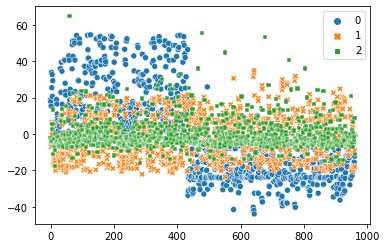

In [273]:
sns.scatterplot(data = pca_df)

## Experiment 2: Defense

### Data Understanding

In [ ]:
sns.pairplot(data = defense)

In [ ]:
defense.corr()

### PreProcessing

**Keep**: Down, YardLine, ToGo, Minute

**Drop**: Second, Quarter

In [ ]:
defense = defense.drop(["Second", "Quarter"], axis = 1)

### Modeling

In [ ]:
defense_ols = smf

## Experiment 3: Penalty

### Data Understanding

### Pre Processing

### Modeling